# Import Required Libraries
Import the necessary libraries, including Keras, Matplotlib, NumPy, and Scikit-learn.

In [1]:
# Importing required libraries
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten

# Load MNIST Dataset
Load the MNIST dataset from Keras datasets.

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a Subset Dataset
Create a new subset of the MNIST dataset for training and testing.

In [3]:
# Create a new subset dataset
subset_train_indices = []
subset_test_indices = []
for class_label in range(10):
    class_indices = np.where(y_train == class_label)[0]
    subset_train_indices.extend(class_indices[:60])
    class_indices = np.where(y_test == class_label)[0]
    subset_test_indices.extend(class_indices[60:70])

X_train = X_train[subset_train_indices]
y_train = y_train[subset_train_indices]
X_test = X_test[subset_test_indices]
y_test = y_test[subset_test_indices]

# Display Dataset Information
Display the length of the subset training and testing data, and the number of instances for each class.

In [4]:
# Display the number of instances for each class in the training set
for i in range(10):
    print(f"Number of instances for class {i} in training set: {sum(y_train == i)}")

# Display the number of instances for each class in the test set
for i in range(10):
    print(f"Number of instances for class {i} in test set: {sum(y_test == i)}")

# Display the length of the subset training data
print(f"Length of subset training data: {len(X_train)}")

# Display the length of the subset testing data
print(f"Length of subset testing data: {len(X_test)}")

Number of instances for class 0 in training set: 60
Number of instances for class 1 in training set: 60
Number of instances for class 2 in training set: 60
Number of instances for class 3 in training set: 60
Number of instances for class 4 in training set: 60
Number of instances for class 5 in training set: 60
Number of instances for class 6 in training set: 60
Number of instances for class 7 in training set: 60
Number of instances for class 8 in training set: 60
Number of instances for class 9 in training set: 60
Number of instances for class 0 in test set: 10
Number of instances for class 1 in test set: 10
Number of instances for class 2 in test set: 10
Number of instances for class 3 in test set: 10
Number of instances for class 4 in test set: 10
Number of instances for class 5 in test set: 10
Number of instances for class 6 in test set: 10
Number of instances for class 7 in test set: 10
Number of instances for class 8 in test set: 10
Number of instances for class 9 in test set: 10


# Visualize the Dataset
Display random images from the training dataset in a grid using Matplotlib.

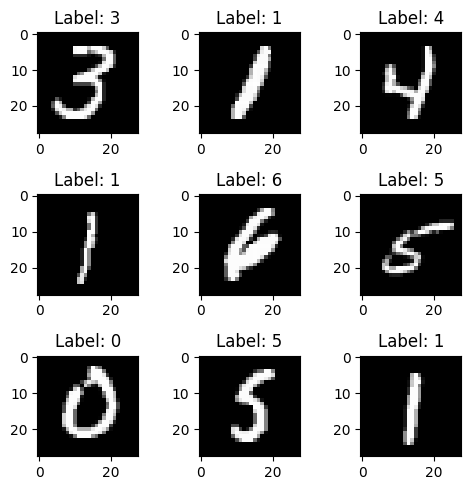

In [5]:
# Display random images in a grid
fig, axes = plt.subplots(3, 3, figsize=(5, 5))  # Create a 3x3 grid of subplots
for i, ax in enumerate(axes.flat):  # Loop over the flattened array of axes
    index = np.random.randint(0, X_train.shape[0])  # Generate a random index
    image = X_train[index]  # Select the image at the random index
    ax.imshow(image, cmap='gray')  # Display the image in grayscale
    ax.set_title(f'Label: {y_train[index]}')  # Set the title of the subplot to the label of the image
plt.tight_layout()  # Adjust the layout to minimize overlap
plt.show()  # Display the plot

# Preprocess the Data
Reshape and normalize the input data, and convert class vectors to binary class matrices.

In [6]:
# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalize the input data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train = X_train.astype('float32') / 255
#X_test = X_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the Model Architecture
Define the architecture of the convolutional neural network model using Keras.

In [7]:
# Define the model architecture
model = Sequential()

# Add a Convolutional layer with 32 filters of size 3x3 and 'relu' activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2))) # Add a MaxPooling layer of size 2x2
model.add(Flatten()) # Flatten the tensor output from the previous layer
model.add(Dense(128, activation='relu')) # Add a Dense layer with 128 neurons and 'relu' activation function
model.add(Dense(10, activation='softmax')) # Add a Dense layer with 10 neurons (one for each class) and 'softmax' activation function

# Compile the Model
Compile the model with the categorical crossentropy loss function, Adam optimizer, and accuracy as the metric.

In [8]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

# Train the Model
Train the model on the training data with a batch size of 128 and for 10 epochs.

In [9]:
# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
5/5 [==============================] - 1s 21ms/step - loss: 41.0930 - accuracy: 0.1800
Epoch 2/20
5/5 [==============================] - 0s 37ms/step - loss: 7.1844 - accuracy: 0.6450
Epoch 3/20
5/5 [==============================] - 0s 32ms/step - loss: 3.7520 - accuracy: 0.7833
Epoch 4/20
5/5 [==============================] - 0s 56ms/step - loss: 2.1541 - accuracy: 0.8367
Epoch 5/20
5/5 [==============================] - 0s 30ms/step - loss: 1.2241 - accuracy: 0.8817
Epoch 6/20
5/5 [==============================] - 0s 29ms/step - loss: 0.7894 - accuracy: 0.9100
Epoch 7/20
5/5 [==============================] - 0s 23ms/step - loss: 0.4136 - accuracy: 0.9333
Epoch 8/20
5/5 [==============================] - 0s 42ms/step - loss: 0.2314 - accuracy: 0.9617
Epoch 9/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1081 - accuracy: 0.9817
Epoch 10/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0638 - accuracy: 0.9900
Epoch 11/20
5/5 [===========

# Evaluate the Model on Training Data
Evaluate the model on the training data and display the training accuracy.

In [10]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 1.0


# Evaluate the Model on Test Data
Evaluate the model on the test data and display the test accuracy.

In [11]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7599999904632568
